# Tensorflow MNIST

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

C:\Users\Rafael\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Rafael\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Rafael\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Rafael\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

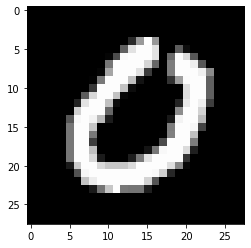

In [2]:
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True)

image = mnist.train.images[7].reshape([28, 28]);
plt.gray()
plt.imshow(image)

In [3]:
print(mnist.train.images[7].shape)
print(mnist.train.labels[7].shape)

(784,)
(10,)


In [4]:
print(mnist.train.images[7][150:200])

[0.         0.         0.37254903 0.8862746  0.9921569  0.9921569
 0.8862746  0.         0.         0.36078432 0.0509804  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01960784 0.29803923
 0.97647065 0.9921569  0.9921569  0.9921569  0.8862746  0.
 0.41176474 0.9843138  0.854902   0.34117648 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [5]:
print(mnist.train.labels[:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [6]:
learning_rate = 0.1
epochs = 1000
batch_size = 128

n_hidden_1 = 256
n_hidden_2 = 256
num_input = 784 # 28 x 28
num_classes = 10

X = tf.placeholder('float', [None, num_input])
Y = tf.placeholder('float', [None, num_classes])

In [7]:
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'output': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'output': tf.Variable(tf.random_normal([num_classes]))
}

In [8]:
def network(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    output_layer = tf.matmul(layer_2, weights['output']) + biases['output']

    return output_layer

In [9]:
logits = network(X)

loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=logits, labels=Y
    )
)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()

In [10]:
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(epochs):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={X: batch_x, Y: batch_y})

        if epoch % 50 == 0:
            train_accuracy = sess.run(
                accuracy, 
                feed_dict={
                    X: mnist.train.images,
                    Y: mnist.train.labels
                }
            )
            
            print('Epoch #{}: train accuracy = {}'.format(epoch, train_accuracy))

    print('Test accuracy = {}'.format(
        sess.run(
            accuracy,
            feed_dict={
                X: mnist.test.images,
                Y: mnist.test.labels
            }
        )
    ))

Epoch #0: train accuracy = 0.3729090988636017
Epoch #50: train accuracy = 0.8296909332275391
Epoch #100: train accuracy = 0.8637090921401978
Epoch #150: train accuracy = 0.8551636338233948
Epoch #200: train accuracy = 0.8606545329093933
Epoch #250: train accuracy = 0.8602545261383057
Epoch #300: train accuracy = 0.8473454713821411
Epoch #350: train accuracy = 0.8479272723197937
Epoch #400: train accuracy = 0.8528363704681396
Epoch #450: train accuracy = 0.8485090732574463
Epoch #500: train accuracy = 0.8501636385917664
Epoch #550: train accuracy = 0.840327262878418
Epoch #600: train accuracy = 0.8257636427879333
Epoch #650: train accuracy = 0.8212363719940186
Epoch #700: train accuracy = 0.8292727470397949
Epoch #750: train accuracy = 0.857200026512146
Epoch #800: train accuracy = 0.8477818369865417
Epoch #850: train accuracy = 0.8205999732017517
Epoch #900: train accuracy = 0.8418727517127991
Epoch #950: train accuracy = 0.8398908972740173
Test accuracy = 0.8198000192642212


# Keras MNIST

In [11]:
tf.__version__

'1.14.0'

In [12]:
batch_size = 128
num_classes = 10
epochs = 2

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 8s 1us/step
60000 train samples
10000 test samples


In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

_ = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=4,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0321 - acc: 0.9890 - val_loss: 0.0782 - val_acc: 0.9810
Epoch 2/4
60000/60000 [==============================] - 14s 231us/sample - loss: 0.0281 - acc: 0.9908 - val_loss: 0.0621 - val_acc: 0.9836
Epoch 3/4
60000/60000 [==============================] - 18s 302us/sample - loss: 0.0249 - acc: 0.9922 - val_loss: 0.0724 - val_acc: 0.9814
Epoch 4/4
60000/60000 [==============================] - 21s 347us/sample - loss: 0.0231 - acc: 0.9922 - val_loss: 0.0870 - val_acc: 0.9783


In [18]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.08696365763970734
Test accuracy: 0.9783
